In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Nt=2000
Nl=50
L=10. #Lado del cubo
tmin=0 #Tiempo mínimo
tmax=.3 #Tiempo máximo.
xmin=-L/2 #Límites en X
xmax=L/2
ymin=-L/2 #Límites en Y.
ymax=L/2
dt=(tmax-tmin)/Nt #Diferenciales
dx=(xmax-xmin)/Nl
dy=(ymax-ymin)/Nl
v=425. # m/s
xcoords=np.linspace(xmin,xmax,Nl) #Cuadrícula en X.
ycoords=np.linspace(xmin,xmax,Nl) #Cuadrícula en Y.
xmesh,ymesh=np.meshgrid(xcoords,ycoords) #Unión de Cuadrículas
tcoords=np.linspace(tmin,tmax,Nt) #Coordenadas en el Tiempo.
#En dos caras opuestas:
#ψ(x,y,0) =
def func1():
    np.exp(-xmesh**2)*np.exp(-ymesh**2)
r=v*dt/dx
drum=np.zeros((Nt,Nl,Nl))  
stdev=0.1
drum[0]=np.exp(-xmesh**2/(2*stdev**2))*np.exp(-ymesh**2/(2*stdev**2))
drum[1]=drum[0]+r**2/2.*(np.roll(drum[0],1,axis=0)+np.roll(drum[0],-1,axis=0)+np.roll(drum[0],1,axis=1)+np.roll(drum[0],-1,axis=1)-4*drum[0])

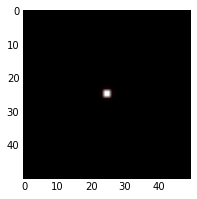

In [3]:
plt.figure(figsize=(10,3))
plt.imshow(drum[1],cmap='gist_heat')
plt.show()

In [4]:
for i in range(2,Nt):
    pdrum=drum[i-1]
    ppdrum=drum[i-2]
    drum[i]=2*(1.-2.*r**2)*pdrum-ppdrum+r**2*(np.roll(pdrum,1,axis=1)+np.roll(pdrum,-1,axis=1)+np.roll(pdrum,1,axis=0)+np.roll(pdrum,-1,axis=0))

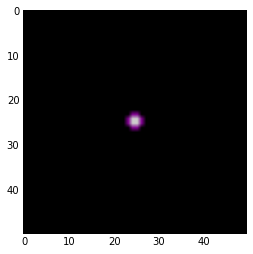

In [5]:
imshow(drum[1], cmap = 'spectral')

##Condiciones Geométricas

In [6]:
Nt=2000
Nl=50
L=10. #Lado del cubo
tmin=0 #Tiempo mínimo
tmax=.3 #Tiempo máximo.
xmin=-L/2 #Límites en X
xmax=L/2
ymin=-L/2 #Límites en Y.
ymax=L/2
dt=(tmax-tmin)/Nt #Diferenciales
dx=(xmax-xmin)/Nl
dy=(ymax-ymin)/Nl
v=425. # m/s
xcoords=np.linspace(xmin,xmax,Nl) #Cuadrícula en X.
ycoords=np.linspace(xmin,xmax,Nl) #Cuadrícula en Y.
xmesh,ymesh=np.meshgrid(xcoords,ycoords) #Unión de Cuadrículas
tcoords=np.linspace(tmin,tmax,Nt) #Coordenadas en el Tiempo.
r=v*dt/dx

##Construcción de las 6 Caras

In [7]:
#Se crean las 6 caras del cubo analizado.
cara1=zeros((Nt,Nl,Nl))
cara2=zeros((Nt,Nl,Nl))
cara2=zeros((Nt,Nl,Nl))
cara3=zeros((Nt,Nl,Nl))
cara4=zeros((Nt,Nl,Nl))
cara5=zeros((Nt,Nl,Nl))
cara6=zeros((Nt,Nl,Nl))

##Condición de Perturbación Inicial

In [8]:
stdev = (1/sqrt(2)) #Desviación Estándar
cara1[0]=np.exp(-xmesh**2/(2*stdev**2))*np.exp(-ymesh**2/(2*stdev**2))
cara1[1]=cara1[0]+r**2/2.*(np.roll(cara1[0],1,axis=0)+np.roll(cara1[0],-1,axis=0)+np.roll(cara1[0],1,axis=1)+np.roll(cara1[0],-1,axis=1)-4*cara1[0])
cara6[0]=np.exp(-xmesh**2/(2*stdev**2))*np.exp(-ymesh**2/(2*stdev**2))
cara6[1]=cara6[0]+r**2/2.*(np.roll(cara6[0],1,axis=0)+np.roll(cara6[0],-1,axis=0)+np.roll(cara6[0],1,axis=1)+np.roll(cara6[0],-1,axis=1)-4*cara6[0])

El Cubo en T=0


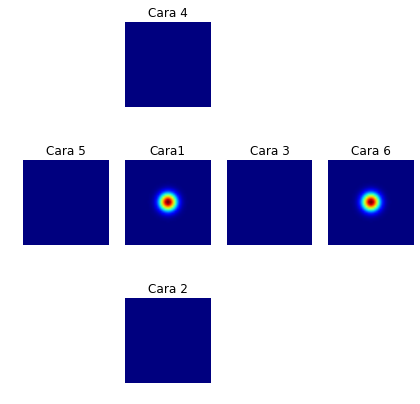

In [25]:
#Visualizar el cubo.
figure(figsize=(7,7))
ax1 = subplot2grid((3,4), (0,1), colspan=1)
imshow(cara4[0])
axis('off')
title("Cara 4")
ax2 = subplot2grid((3,4), (1,0), colspan=1)
imshow(cara5[0])
axis('off')
title("Cara 5")
ax3 = subplot2grid((3,4), (1,1), colspan=1)
imshow(cara1[0])
axis('off')
title("Cara1")
ax4 = subplot2grid((3,4), (1,2), colspan=1)
imshow(cara3[0])
axis('off')
title("Cara 3")
ax5 = subplot2grid((3,4), (1,3), colspan=1)
imshow(cara6[0])
axis('off')
title("Cara 6")
ax6 = subplot2grid((3,4), (2,1), colspan=1)
imshow(cara2[0])
axis('off')
title("Cara 2")
print("El Cubo en T=0")

##Condiciones de Frontera Periódicas

In [44]:
for i in range(2,Nl):
    pdrum=cara1[i-1]
    ppdrum=cara1[i-2]
    cara1[i]=2*(1.-2.*r**2)*pdrum-ppdrum+r**2*(np.roll(pdrum,1,axis=1)+np.roll(pdrum,-1,axis=1)+np.roll(pdrum,1,axis=0)+np.roll(pdrum,-1,axis=0))

In [ ]:
for i in range(2,Nl):
    if i < Nl:
        pdrum=cara2[i-1]
        ppdrum=cara2[i-2]
        cara2[i]=2*(1.-2.*r**2)*pdrum-ppdrum+r**2*(np.roll(pdrum,1,axis=1)+np.roll(pdrum,-1,axis=1)+np.roll(pdrum,1,axis=0)+np.roll(pdrum,-1,axis=0))
    else:
        pdrum=cara2[i-1]
        ppdrum=cara2[i-2]
        cara2[i] = 2*(1.-2.*r**2)*pdrum-ppdrum+r**2*(np.roll(cara2[i-1],1, axis=0) + np.roll(pdrum,-1,axis=0) + np.roll(cara4[i-1],1,axis=1) + np.roll(pdrum, -1, axis=1))
     

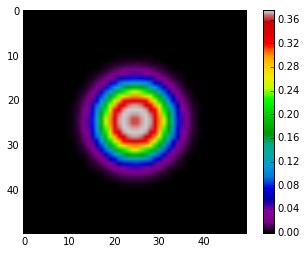

In [47]:
imshow(cara1[10], cmap = 'spectral')
colorbar()